In [99]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import resample
from sklearn.linear_model import LogisticRegression


In [100]:
dataset= '/content/mcdonalds.csv'
df = pd.read_csv(dataset)
MD_x = (df.iloc[:, 0:11] == 'Yes').astype(int)

In [101]:
df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


In [102]:
df.describe(),  df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   object
 1   convenient      1453 non-null   object
 2   spicy           1453 non-null   object
 3   fattening       1453 non-null   object
 4   greasy          1453 non-null   object
 5   fast            1453 non-null   object
 6   cheap           1453 non-null   object
 7   tasty           1453 non-null   object
 8   expensive       1453 non-null   object
 9   healthy         1453 non-null   object
 10  disgusting      1453 non-null   object
 11  Like            1453 non-null   object
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
dtypes: int64(1), object(14)
memory usage: 170.4+ KB


(               Age
 count  1453.000000
 mean     44.604955
 std      14.221178
 min      18.000000
 25%      33.000000
 50%      45.000000
 75%      57.000000
 max      71.000000,
 None)

In [103]:
print(df.isnull().sum())

yummy             0
convenient        0
spicy             0
fattening         0
greasy            0
fast              0
cheap             0
tasty             0
expensive         0
healthy           0
disgusting        0
Like              0
Age               0
VisitFrequency    0
Gender            0
dtype: int64


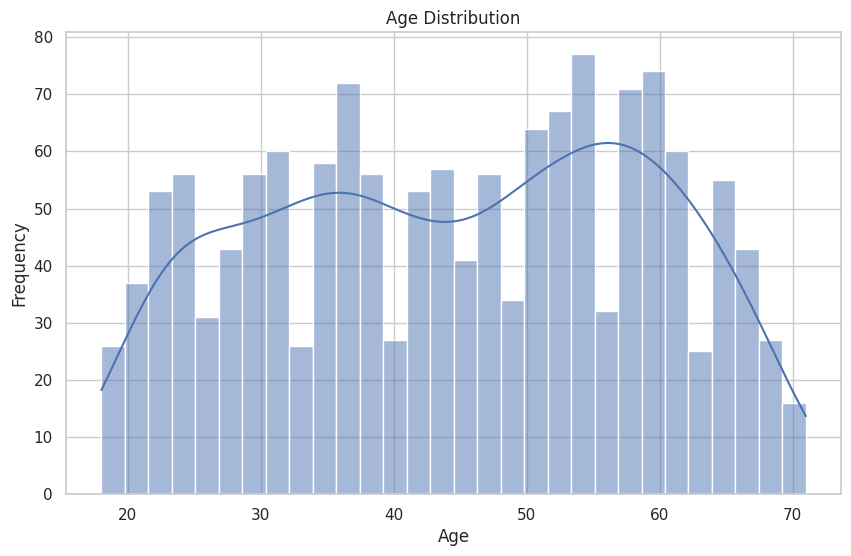

In [104]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

#Age Plot
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], kde=True, bins=30)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

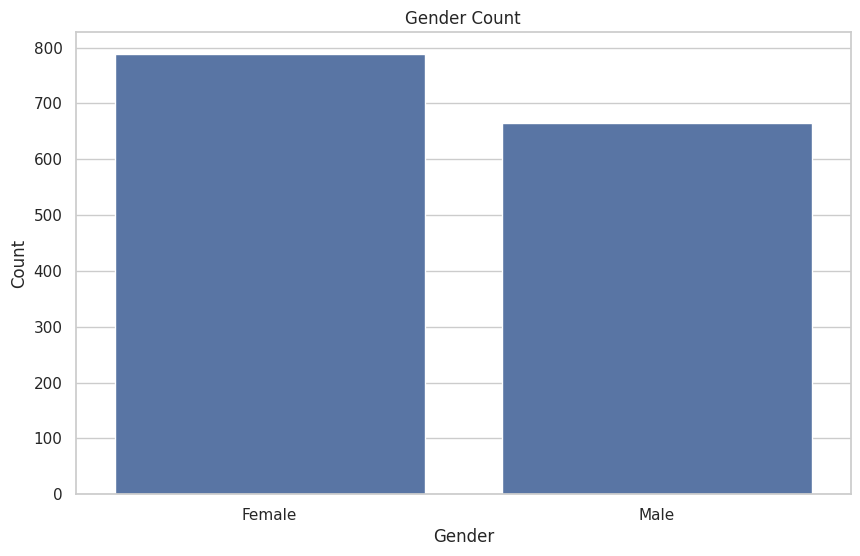

In [105]:
# Gender Plot
plt.figure(figsize=(10, 6))
sns.countplot(x='Gender', data=df)
plt.title('Gender Count')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

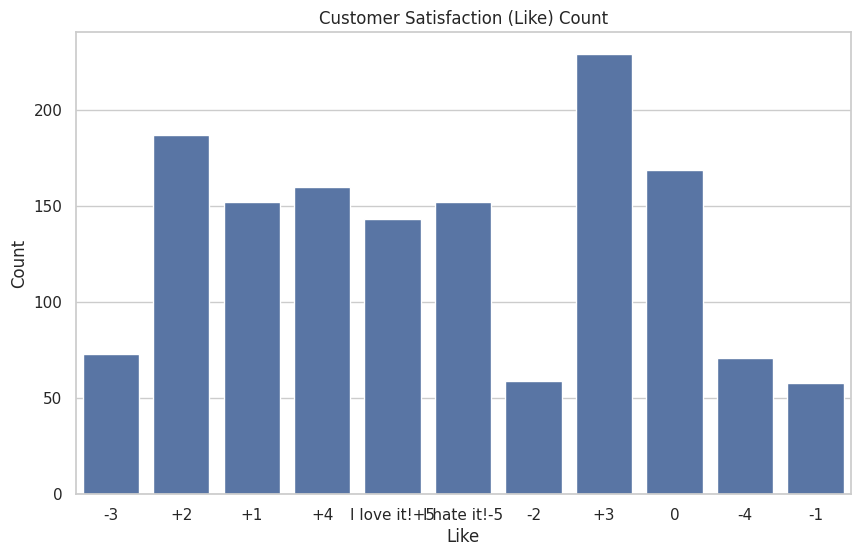

In [106]:

# Customer Satisfaction Plot
plt.figure(figsize=(10, 6))
sns.countplot(x='Like', data=df)
plt.title('Customer Satisfaction (Like) Count')
plt.xlabel('Like')
plt.ylabel('Count')
plt.show()


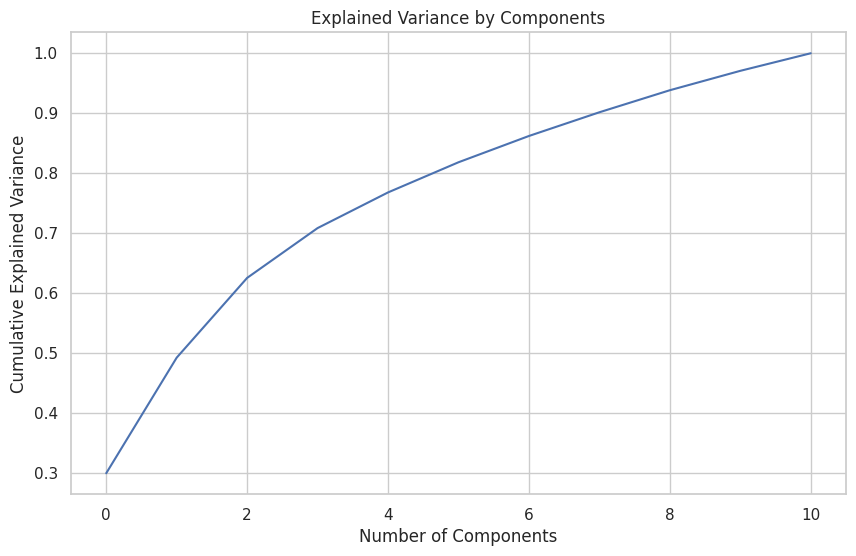

In [107]:
# Perform PCA
pca = PCA()
MD_pca = pca.fit_transform(MD_x)

# Plot the explained variance ratio
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Components')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

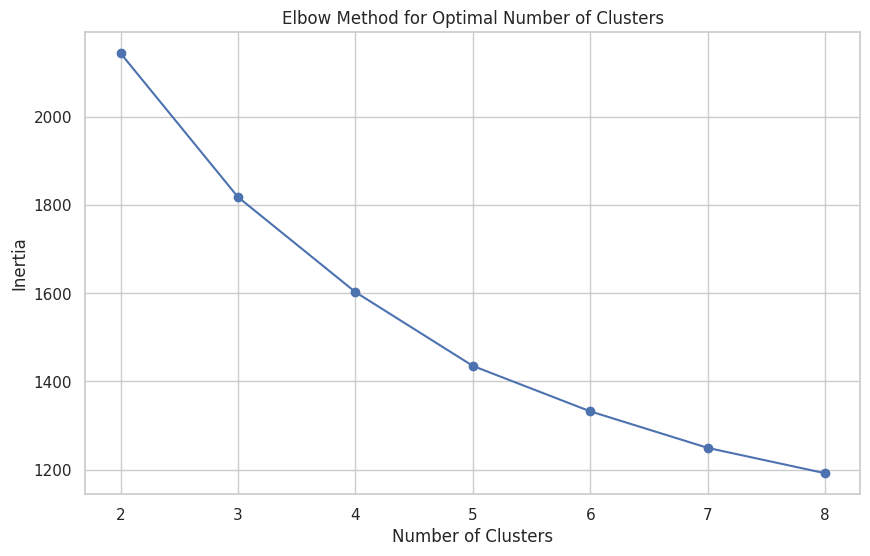

In [108]:
# Determine optimal number of clusters using elbow method
inertia = []
for k in range(2, 9):
    kmeans = KMeans(n_clusters=k, random_state=1234)
    kmeans.fit(MD_x)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(2, 9), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

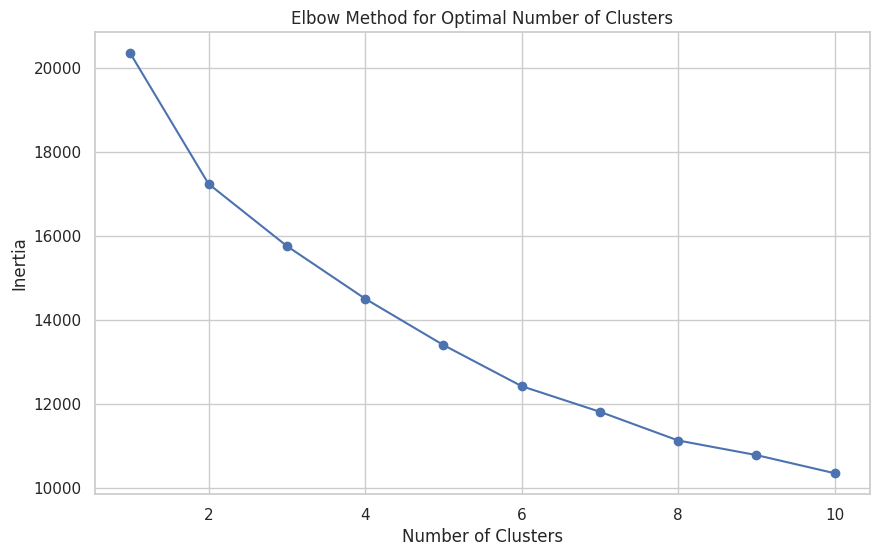

In [109]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Use the elbow method to find the optimal number of clusters
inertia = []
range_clusters = range(1, 11)
for n_clusters in range_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(features_scaled)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(range_clusters, inertia, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()


In [110]:
# Apply KMeans with optimal number of clusters (e.g., 4)
optimal_clusters = 4
kmeans = KMeans(n_clusters=optimal_clusters, random_state=1234)
df['Cluster'] = kmeans.fit_predict(MD_x)

# Analyze the segments
for cluster in range(optimal_clusters):
    print(f"Cluster {cluster}")
    print(df[df['Cluster'] == cluster].describe())


Cluster 0
              Age  Cluster
count  364.000000    364.0
mean    49.137363      0.0
std     13.281767      0.0
min     18.000000      0.0
25%     39.000000      0.0
50%     52.000000      0.0
75%     59.000000      0.0
max     70.000000      0.0
Cluster 1
              Age  Cluster
count  240.000000    240.0
mean    48.070833      1.0
std     12.226557      0.0
min     18.000000      1.0
25%     39.000000      1.0
50%     49.000000      1.0
75%     58.250000      1.0
max     70.000000      1.0
Cluster 2
              Age  Cluster
count  533.000000    533.0
mean    42.866792      2.0
std     14.955796      0.0
min     18.000000      2.0
25%     30.000000      2.0
50%     41.000000      2.0
75%     57.000000      2.0
max     71.000000      2.0
Cluster 3
              Age  Cluster
count  316.000000    316.0
mean    39.683544      3.0
std     13.246426      0.0
min     18.000000      3.0
25%     29.000000      3.0
50%     38.500000      3.0
75%     50.000000      3.0
max     70.0000

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

Mean Adjusted Rand Index for Stability: 0.8432562176638855


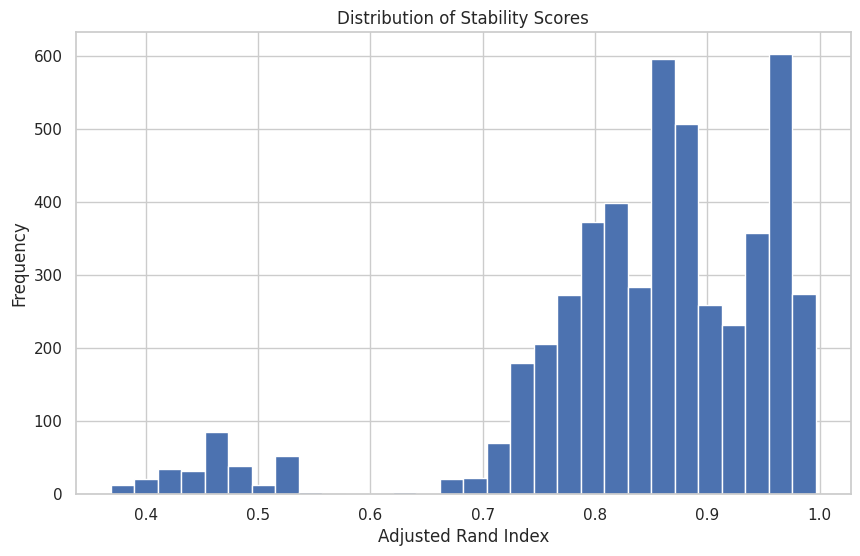

In [111]:
# Calculate cluster stability using bootstrapping
n_bootstrap = 100
cluster_labels = np.zeros((n_bootstrap, len(df)))

for i in range(n_bootstrap):
    X_resampled, y_resampled = resample(MD_x, kmeans.labels_, random_state=i)
    kmeans_resampled = KMeans(n_clusters=optimal_clusters, random_state=1234)
    kmeans_resampled.fit(X_resampled)
    cluster_labels[i] = kmeans_resampled.predict(MD_x)

# Calculate adjusted Rand index for stability
stability_scores = []
for i in range(n_bootstrap):
    for j in range(i + 1, n_bootstrap):
        stability_scores.append(adjusted_rand_score(cluster_labels[i], cluster_labels[j]))

print("Mean Adjusted Rand Index for Stability:", np.mean(stability_scores))

# Plot stability scores
plt.figure(figsize=(10, 6))
plt.hist(stability_scores, bins=30)
plt.xlabel('Adjusted Rand Index')
plt.ylabel('Frequency')
plt.title('Distribution of Stability Scores')
plt.show()


In [112]:
from sklearn.linear_model import LogisticRegression
import re

# Extract numerical rating from the 'Like' column
df['Like_n'] = df['Like'].apply(lambda x: int(re.search(r'\d+', x).group()))

# Reverse the rating scale
df['Like_n'] = 6 - df['Like_n']

# Prepare features and target variable
features = df.iloc[:, 0:11].applymap(lambda x: 1 if x == 'Yes' else 0)
target = df['Like_n']

# Fit logistic regression model
log_reg = LogisticRegression()
log_reg.fit(features, target)

# Print regression coefficients
print("Regression Coefficients:")
print(pd.DataFrame({'Feature': features.columns, 'Coefficient': log_reg.coef_[0]}))


Regression Coefficients:
       Feature  Coefficient
0        yummy     0.644023
1   convenient    -1.195598
2        spicy    -0.219880
3    fattening    -0.385273
4       greasy    -0.032217
5         fast    -0.004630
6        cheap     0.264207
7        tasty    -0.265891
8    expensive     0.227351
9      healthy     0.494782
10  disgusting     1.174485


<ipython-input-112-d547f8c9713a>:11: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  features = df.iloc[:, 0:11].applymap(lambda x: 1 if x == 'Yes' else 0)
